# DATA MINING & ORGANIZAR LOS DATOS

In [3]:
import pandas as pd
from IPython.core.display import HTML
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data["data"]
#data.data

data_df=pd.DataFrame(data=data.data,columns=data.feature_names)
display(HTML(data_df.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
data.target
target=pd.DataFrame(data=data.target,columns=["species"])
display(HTML(target.to_html()))

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [7]:
iris=pd.concat([data_df,target],axis=1)
display(HTML(iris.to_html()))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [8]:
iris.rename({
    "sepal length (cm)":"sepal_length",
    "sepal width (cm)":"sepal_width",
    "petal length (cm)":"petal_length",
    "petal width (cm)":"petal_width"   
},axis=1,inplace=True)
display(HTML(iris.to_html()))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
#https://docs.hektorprofe.net/python/funcionalidades-avanzadas/funcion-map/#:~:text=La%20función%20map()%20se,que%20tengan%20la%20misma%20longitud.
#https://www.digitalocean.com/community/tutorials/how-to-use-the-python-map-function-es
iris["species"]=iris.species.map(lambda x:data.target_names[x])
#la funcion map con lamba hace una especie de reemplazo al bucle for,
#aplica una accion a cada miembro  de la lista que estamos modificando
#en este caso busca la posicion target_names[0],target_names[1],target_names[2]
#y reemplaza por su respectivo valor que seria el nombre de la especie

display(HTML(iris.to_html()))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
iris.isna().sum()#verificamos si hay valores nulos NaN

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

# ANALISIS DE LOS DATOS

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
PRIMER ANALISIS

Entre mas grande sea la desviacion estandar (mas lejos esta el punto del modelo) menos parecido
es la muestra del modelo
desviacion estandar alta es malo!!!!!!!!!

si al desviacion estandar es pequeña hay mas correlacion
recordemos que la correlacion es que tanto se parece la muestra al modelo


Analizamos desviacion estandar

petal_length tiene la mayor desviación estándar en comparación con otras características,
petal_width parece tener un rango de valores más estrecho
Sería mejor realizar una regularización después de comprobar el rendimiento 
del modelo debido a las diferencias de escala entre las características.

In [9]:
iris.corr()#correlacion:analiza la relacion (que tanto se parecen) las caracteristicas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
El coeficiente de correlación de la petal_length
y de petal_width es de 0,962865, que es extremadamente alto. 
Dado que las características altamente correlacionadas pueden inducir problemas (IA)
de multicolinealidad, se recomienda seleccionar una de las dos variables a utilizar.
o mejor, mirar como diferenciar haciendo un deep trainig con las otras caracteristicas

In [10]:
iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [19]:
 iris.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [ ]:
Seleccione entre "size" y "count" dependiendo del propósito del análisis,
ya que "size" cuenta el número de datos que incluyen valores NaN,
mientras que "count" cuenta el número de datos sin valores NaN.
En este caso, no hay diferencia entre "size" y "count" porque los datos de 
iris no tienen valores NaN.

# GRAFICAS REPRESENTATIVAS

# box plot -> diagrama de caja

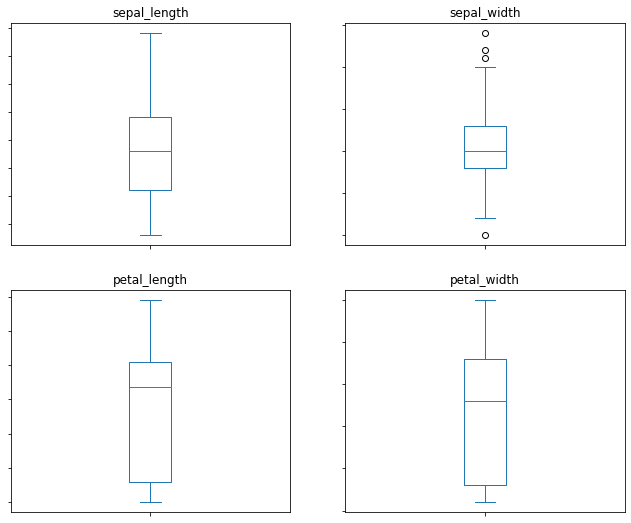

In [20]:
#https://byjus.com/maths/box-plot/

def boxplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=False,
                        labeltop=False,
                        labelright=False,
                        labelbottom=False)
        dataset[col].plot(kind="box",subplots=True,sharex=False)
        plt.title(col)
        i+=1
    plt.show()
    
boxplot_iris(iris.columns[:-1],iris)

In [ ]:
Dado que las longitudes de las cajas de sepal_length y sepal_width son cortas,
se puede deducir que la tendencia de centralización de los datos es alta. 
El valor atípico se detecta en petal_width, y la longitud de caja larga de petal_length
y petal_width indica que los datos están más ampliamente distribuidos. 

# HISTOGRAMA

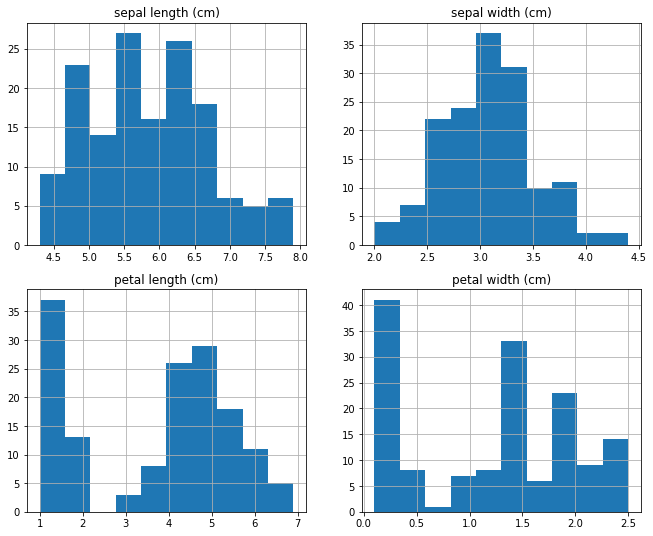

In [11]:
def hisplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=True,
                        labeltop=False,
                        labelright=False,
                        labelbottom=True)
        dataset[col].hist()
        plt.title(col)
        i+=1
    plt.show()
    
hisplot_iris(iris.columns[:-1],iris)

In [ ]:
La frecuencia del intervalo de clase de la mediana es alta para sepal_width, 
y se vuelve más baja a medida que se aleja del centro. 
En el diagrama de caja, la longitud de la caja de sepal_width es corta porque se agregaron muchos datos en la mediana.
En el caso de la petal_width, la frecuencia del intervalo de clase de la mediana es alta, pero hay muchos datos en 
el intervalo de clase de la izquierda. 
En el gráfico de caja, la caja de petal_lengh es larga hasta el fondo porque hay muchos 
datos en valores inferiores. 


# CONTINUACION SEMANA 13 

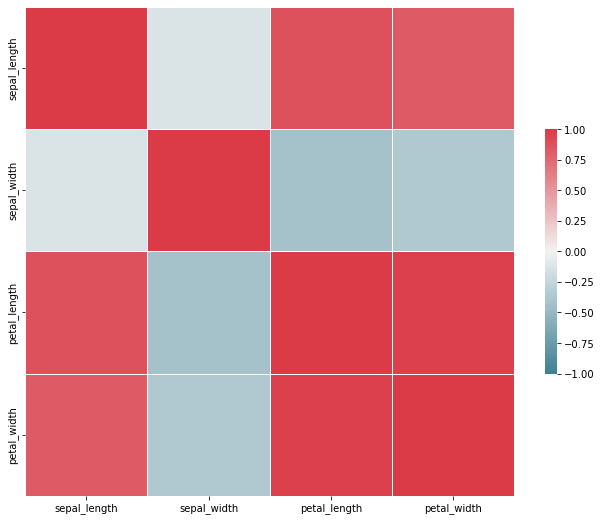

In [10]:
#visualizar la correlacion

import seaborn as sns

#mapa de calor(heatmap)

#https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr=iris.corr()
cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(11,9))
sns.heatmap(corr,
            cmap=cmap,
            vmax=1.0,
            vmin=-1.0,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink":0.5}     
           )
plt.show()

[]

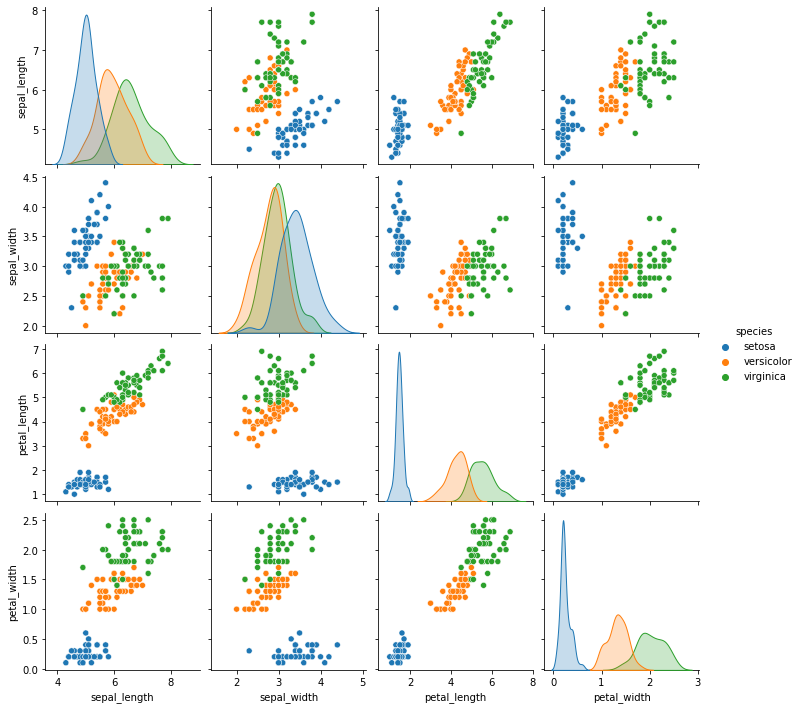

In [11]:
#MATRIZ DE GRAFICOS DE DISPERSION

#Una matriz de graficos de dispersion puede mostrar la relacion entre multiples variables

#https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.pairplot(iris,hue="species")
plt.plot()

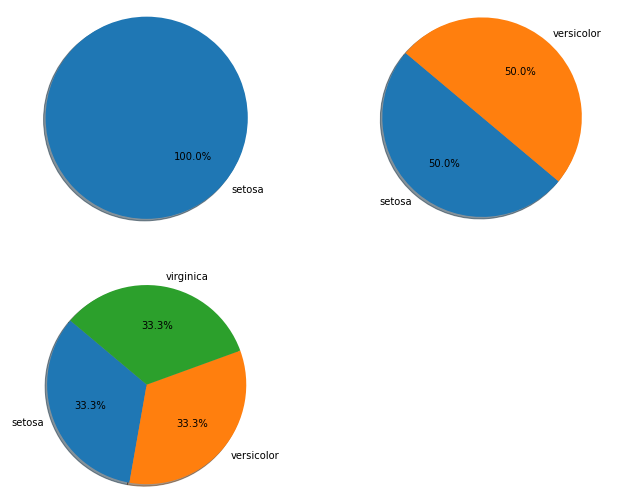

In [12]:
#grafico circular

def piechar_iris(feature_names,target,dataset):
    i=1
    plt.figure(figsize=(11,9))
    for colname in [target]:
        labels=[]
        sizes=[]
        df=dataset.groupby(colname).size()
        for key in df.keys():
            labels.append(key)
            sizes.append(df[key])
            plt.subplot(2,2,i)
            plt.axis("on")
            plt.tick_params(axis="both",
                            left=True,
                            top=False,
                            right=False,
                            bottom=True,
                            labelleft=True,
                            labeltop=True,
                            labelright=False,
                            labelbottom=False)
            plt.pie(sizes,labels=labels,autopct="%1.1f%%",shadow=True,startangle=140)
            plt.axis("equal")
            i+=1
        plt.show()
            
piechar_iris(iris.columns[:-1],iris.species,iris)    

# CREAMOS EL MODELO DE MACHINE LEARNING

In [ ]:
#repaso

Antes de iniciar el aprendizaje automático, hay que dividir el conjunto de datos en datos de entrenamiento
y datos de prueba de rendimiento. El objetivo final del aprendizaje automático es crear un modelo generalizado
para que pueda predecir con precisión nuevos datos. Si se evalúa el rendimiento con los datos que se utilizaron 
en el aprendizaje, la posibilidad de acertar es alta, ya que el modelo ya está familiarizado con la característica 
de los datos dada. Para que la evaluación sea fiable, hay que separar el conjunto de datos de prueba de rendimiento 
del conjunto de datos de entrenamiento. Por tratarse de la separación de los datos, se denomina método hold out.

Divida el conjunto de datos de entrenamiento y el conjunto de datos de prueba de rendimiento con la función 
train_test_split de sklearn. Clasifique los datos de entrenamiento como "train" y los datos de prueba de rendimiento 
como "test". X es la característica del conjunto de datos, e y es el objetivo. Para el análisis de datos estructurados,
indique DataFrame con mayúsculas y Series con minúsculas. La opción test_size=0,33 separa el 33% de los datos totales
como conjunto de prueba. random_state=42 es una opción utilizada para inducir resultados reproducibles para el problema
de la práctica. Si no se designa random_state, el conjunto de datos para la conversión será diferente cada vez.


#NOTA: 3 pasos : 
#    1:instanciar
#        1.1:definir el modelo
#    2:fit ->ajustar
#    3:predecir    

#para instanciar, utilice el hiperparametro del modelo como argumento.
#el hiperparametro es una opcion que REQUIERE CONFIGURACION HUMANA (AI SUPERVISADA!!!!!!!!)
#afecta MUCHO al rendimiento del modelo

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#ver en la webpage : https://scikit-learn.org/stable/modules/tree.html#classification

#instanciar el estimador y ajustar los parametros
x_train,x_test,y_train,y_test=train_test_split(iris.iloc[:,:-1],iris.iloc[:,-1],test_size=0.33,random_state=42)
#                                            datos 4 columnas,species 

#inicializacion del modelo de arbol(ramificacion) mediante entropia 
model=DecisionTreeClassifier(criterion="gini",
                             splitter="best",
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             random_state=42,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0,
                             class_weight=None
                             )
#Impureza de Gini o entropía
#La diferencia entre la impureza de Gini y la entropía es imprecisa en la vida real. Ambas crean un árbol similar. 
# El cálculo de la impureza de Gini es más rápido, por lo que se recomienda por defecto. Sin embargo, al crear un 
#árbol diferente, mientras que la impureza de Gini tiende a aislar la clase más frecuente a un lado, 
# la entropía da lugar a un árbol más equilibrado. 

# Regularización: Limita el grado de libertad del árbol de decisión.
# Disminuir la profundidad máxima restringiría el modelo y reduciría el riesgo de sobreajuste. 
# min_samples_split: Cantidad mínima de muestras requeridas por el nodo para la división.  
# min_weight_fraction_leaf: Idéntico al min_samples_leaf, pero es la fracción con peso en toda la muestra. 
# max_leaf_nodes: Número máximo de nodos hoja.
# max_features: Número máximo de la característica que se utilizará para la división por cada nodo. 

# Aumentar el parámetro que empieza por min_ o bajar el que empieza por max_ aumentaría la restricción del modelo. 


In [17]:
#OJO!!!!! AQUI ESTA APRENDIENDO :D
model.fit(x_train,y_train) #le mando los datos de train para que entrene y aprenda
#fit ajusta los datos para crear un modelo (regresion) que pueda predecir los datos

DecisionTreeClassifier(random_state=42)

In [19]:
print("la eficiencia de la IA es: ",model.score(x_test,y_test))

#Evalúa el rendimiento utilizando el conjunto de datos de prueba de rendimiento.
#En el Scikit-learn, la puntuación se refiere a la precisión. Dado que el conjunto de datos de iris
#es un conjunto de datos bien estructurado para la práctica, generalmente muestra un alto rendimiento en cualquier modelo

la eficiencia de la IA es:  0.98


# Estrategia de generalizacion del modelo